In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [38]:
nb_classes = 10

# 28x28크기의 이미지 => 28x28 = 784
X = tf.placeholder(tf.float32 , shape=[None , 784])

# 0~9 digist -> 10개의 class
Y = tf.placeholder(tf.float32 , shape=[None , nb_classes])

In [39]:
mnist = input_data.read_data_sets("MNIST_data/" , one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
#초기값을 xavier로 최적의 W값을 선택해줌
#keep_prob : 몇프로를 keep할것인가 
#보통 Train을 할때는 0.5~0.7 -> 보통 모든 노드를 사용하지않고 일부 골라서 학습 , testing을 할때는 1, 모든 nn을 다 사용
#1번째 Layer
keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("a11" , shape=[784,256] , initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)


L1 = tf.nn.dropout(L1, keep_prob=keep_prob)  

#2번째 Layer
W2 = tf.get_variable("a22" , shape=[256,256] , initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2) + b2) 
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)  


W3 = tf.get_variable("a33" , shape=[256,10] , initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))

In [43]:
hypothesis = tf.matmul(L2,W3) + b3

In [44]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))

In [45]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01) #여러개의 optimizer가 있음.

In [46]:
train = optimizer.minimize(cost)

In [49]:
#Test model
is_correct = tf.equal(tf.arg_max(hypothesis,1) , tf.arg_max(Y,1))

#Calculate Accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct , tf.float32))

Epoch : 0001 cost =  0.428801941
Epoch : 0002 cost =  0.302890315
Epoch : 0003 cost =  0.283699073
Epoch : 0004 cost =  0.275824483
Epoch : 0005 cost =  0.264169642
Epoch : 0006 cost =  0.249938939
Epoch : 0007 cost =  0.254342437
Epoch : 0008 cost =  0.264268455
Epoch : 0009 cost =  0.247886593
Epoch : 0010 cost =  0.245316121
Learning Finished
Accuracy :  0.9585
9520
Label :  [1]
Prediction :  [1]


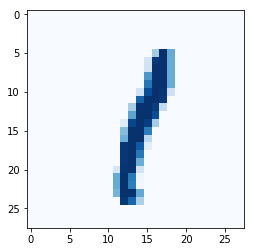

In [51]:
# epoch = 전체 데이터를 몇번씩 학습시킬지
training_epochs = 10

#size만큼의 traindata를 가져와서 학습을 시킴
batch_size = 100


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(training_epochs) :
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch) :
            batch_xs , batch_ys = mnist.train.next_batch(batch_size)
            c , _ = sess.run([cost , train] , feed_dict = { X : batch_xs, Y : batch_ys , keep_prob : 0.7})
            avg_cost += c  / total_batch
        print('Epoch :' , '%04d' % (epochs +1 ) , 'cost = ', '{:.9f}'.format(avg_cost) )     
    
    print("Learning Finished")
   #Test the model using test sets
    print("Accuracy : ", accuracy.eval(session=sess , feed_dict={X : mnist.test.images , Y : mnist.test.labels , keep_prob : 1}))     
    
    #mnist.test의 예제 중 하나를 랜덤으로 읽음
    r = random.randint(0, mnist.test.num_examples -1)
    print(r)
    print("Label : " , sess.run(tf.arg_max(mnist.test.labels[r:r+1] , 1)))  # mnist.test.labels리스트가 one_hot 이기에 arg_max를 이용
    print("Prediction : ", sess.run(tf.arg_max(hypothesis,1), feed_dict={X : mnist.test.images[r:r+1] , keep_prob : 1} ))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28) , cmap = 'Blues' , interpolation ='nearest')
    plt.show()